In [1]:
import os, glob, numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 18})

In [2]:
def load_dataframe_from_files(dirin, fileprefix, max_files=100):
    import glob
    files = glob.glob(os.path.join(dirin, fileprefix))
    print("[Info] Loading {} files wt prefix:\n{}".format(len(files), fileprefix))
    df = pd.read_csv(files[0], comment='#', index_col=False)
    for file in files[1:max_files]:
        print(".", end='')
        dftmp = pd.read_csv(file, comment='#', index_col=False)
        df = pd.concat([df, dftmp])
    print("")
    return df

In [3]:
dirin = os.path.join("..", "..", "Data", "OutputProcessing", "Ar39_07_09_2020", "Ar39_Snapshots")
fileinprefix = "Snapshot{}Ar39*.csv"

minPEcut = 5
ar39_dfs = []
ar39_dfs_names = []
for nPileups in range(1, 8):    # 2, 3, 4, 5, 6, 7
    df_ar39 = load_dataframe_from_files(dirin, fileinprefix.format(nPileups), max_files=100)
    df_ar39 = df_ar39[df_ar39.columns[:-1]]
    df_ar39 = df_ar39[df_ar39.pedetected>=minPEcut]
    ar39_dfs.append(df_ar39)
    ar39_dfs_names.append("{} Ar39 Pileup".format(nPileups))
del df_ar39

[Info] Loading 100 files wt prefix:
Snapshot1Ar39*.csv
...................................................................................................
[Info] Loading 100 files wt prefix:
Snapshot2Ar39*.csv
...................................................................................................
[Info] Loading 100 files wt prefix:
Snapshot3Ar39*.csv
...................................................................................................
[Info] Loading 100 files wt prefix:
Snapshot4Ar39*.csv
...................................................................................................
[Info] Loading 100 files wt prefix:
Snapshot5Ar39*.csv
...................................................................................................
[Info] Loading 100 files wt prefix:
Snapshot6Ar39*.csv
...................................................................................................
[Info] Loading 100 files wt prefix:
Snapshot7Ar39*.csv
...............

In [4]:
dirin = os.path.join("..", "..", "Data", "OutputProcessing", "Muons_07_09_2020", "Muons_Snapshots")
fileinprefix = "SnapshotMuon*.csv"

df_mu = load_dataframe_from_files(dirin, fileinprefix, max_files=200)
df_mu = df_mu[df_mu.pedetected>0]
df_mu = df_mu[df_mu.columns[:-1]]

[Info] Loading 200 files wt prefix:
SnapshotMuon*.csv
.......................................................................................................................................................................................................


## Data Selection: select events with overlapping energy spectrum

In [5]:
for df_ar39, name in zip(ar39_dfs, ar39_dfs_names):
    print("[Info] {}: Min PE: {:.2f}, Mean PE: {:.2f}, Max PE: {:.2f}".format(name, df_ar39.pedetected.min(), df_ar39.pedetected.mean(), df_ar39.pedetected.max()))

[Info] 1 Ar39 Pileup: Min PE: 5.00, Mean PE: 8.52, Max PE: 60.00
[Info] 2 Ar39 Pileup: Min PE: 5.00, Mean PE: 9.47, Max PE: 63.00
[Info] 3 Ar39 Pileup: Min PE: 5.00, Mean PE: 11.31, Max PE: 78.00
[Info] 4 Ar39 Pileup: Min PE: 5.00, Mean PE: 14.16, Max PE: 79.00
[Info] 5 Ar39 Pileup: Min PE: 5.00, Mean PE: 17.57, Max PE: 94.00
[Info] 6 Ar39 Pileup: Min PE: 6.00, Mean PE: 21.09, Max PE: 113.00
[Info] 7 Ar39 Pileup: Min PE: 7.00, Mean PE: 24.60, Max PE: 99.00


In [6]:
maxPEar39 = 115    # max is 113, 115 is a sort of upperbound (temporany)
df_lemu = df_mu[(df_mu.pedetected >= minPEcut) & (df_mu.pedetected <= maxPEar39)]
for df_ar39, name in zip(ar39_dfs, ar39_dfs_names):
    print("[Info] {}: Loaded {} Ar39 Pileups, with maximum {} PE detected".format(name, len(df_ar39), df_ar39.pedetected.max()))
print("[Info] Selected {} Muons, with maximum {} PE detected".format(len(df_lemu), df_lemu.pedetected.max()))

[Info] 1 Ar39 Pileup: Loaded 1474688 Ar39 Pileups, with maximum 60 PE detected
[Info] 2 Ar39 Pileup: Loaded 1947067 Ar39 Pileups, with maximum 63 PE detected
[Info] 3 Ar39 Pileup: Loaded 1890920 Ar39 Pileups, with maximum 78 PE detected
[Info] 4 Ar39 Pileup: Loaded 1561075 Ar39 Pileups, with maximum 79 PE detected
[Info] 5 Ar39 Pileup: Loaded 1261754 Ar39 Pileups, with maximum 94 PE detected
[Info] 6 Ar39 Pileup: Loaded 1051448 Ar39 Pileups, with maximum 113 PE detected
[Info] 7 Ar39 Pileup: Loaded 901235 Ar39 Pileups, with maximum 99 PE detected
[Info] Selected 6247 Muons, with maximum 115 PE detected


## Remove Test Data for later evaluation

In [7]:
# Remove test data for later eval
n_test_mu, n_test_ar = 1000, 100000
# split mu data
id_mu = np.arange(len(df_lemu))
np.random.shuffle(id_mu)
muons_test, muons_train = df_lemu.iloc[id_mu[:n_test_mu], :], df_lemu.iloc[id_mu[n_test_mu:], :]
print("[Info] Muon Train {}, Test {}".format(len(muons_train), len(muons_test)))
# split ar39 data
ar39_dfs_train, ar39_dfs_test = [], []
for df_ar39, name in zip(ar39_dfs, ar39_dfs_names):
    id_ar = np.arange(len(df_ar39))
    np.random.shuffle(id_ar)
    ar39_test, ar39_train = df_ar39.iloc[id_ar[:n_test_ar], :], df_ar39.iloc[id_ar[n_test_ar:], :]
    ar39_dfs_train.append(ar39_train)
    ar39_dfs_test.append(ar39_test)
    print("[Info] {}: Ar39 Train {}, Test {}".format(name, len(ar39_train), len(ar39_test)))

[Info] Muon Train 5247, Test 1000
[Info] 1 Ar39 Pileup: Ar39 Train 1374688, Test 100000
[Info] 2 Ar39 Pileup: Ar39 Train 1847067, Test 100000
[Info] 3 Ar39 Pileup: Ar39 Train 1790920, Test 100000
[Info] 4 Ar39 Pileup: Ar39 Train 1461075, Test 100000
[Info] 5 Ar39 Pileup: Ar39 Train 1161754, Test 100000
[Info] 6 Ar39 Pileup: Ar39 Train 951448, Test 100000
[Info] 7 Ar39 Pileup: Ar39 Train 801235, Test 100000


## Augment Muons
Idea: since we aim to exploit topological information and the cylinder is symmetric, we can roll the inner/outer detections to augment the muon data. 

However, the inner/outer shroud has a different diameter and then, different number of slices. 
Considering 12 inner slices and 20 outer slices, a quadrant (1/4) is composed by respectively 3 and 5 slices. We can roll the inner and outer detections separately by this factor to have a quadrant augmentation.

In [8]:
import warnings
def augment_muons_by_roll(muon_df, n_inner_slices=12, n_outer_slices=20, n_inner_roll=3, n_outer_roll=5):
    X_inner = muon_df.iloc[:, :n_inner_slices].to_numpy()
    X_outer = muon_df.iloc[:, n_inner_slices:n_inner_slices+n_outer_slices].to_numpy()
    if not n_inner_slices/n_inner_roll == n_outer_slices/n_outer_roll:
        warnings("[Warning] The inner/outer rolls are not consistent. Break.")
        return
    n_rolls = int(n_inner_slices / n_inner_roll)
    for roll in np.array(np.linspace(0, n_inner_slices, n_rolls+1)[:-1], dtype='int'):
        if roll==0:
            XX_inner = X_inner
        else:
            XX_inner = np.concatenate([XX_inner, np.roll(X_inner, roll, axis=1)])
    for roll in np.array(np.linspace(0, n_outer_slices, n_rolls+1)[:-1], dtype='int'):
        if roll==0:
            XX_outer = X_outer
        else:
            XX_outer = np.concatenate([XX_outer, np.roll(X_outer, roll, axis=1)])
    return pd.DataFrame(np.concatenate([XX_inner, XX_outer], axis=1))

In [9]:
aug_mu_train = augment_muons_by_roll(muons_train.iloc[:, 3:])
print("[Info] Augmented Muon Data: {} instances".format(len(aug_mu_train)))

[Info] Augmented Muon Data: 20988 instances


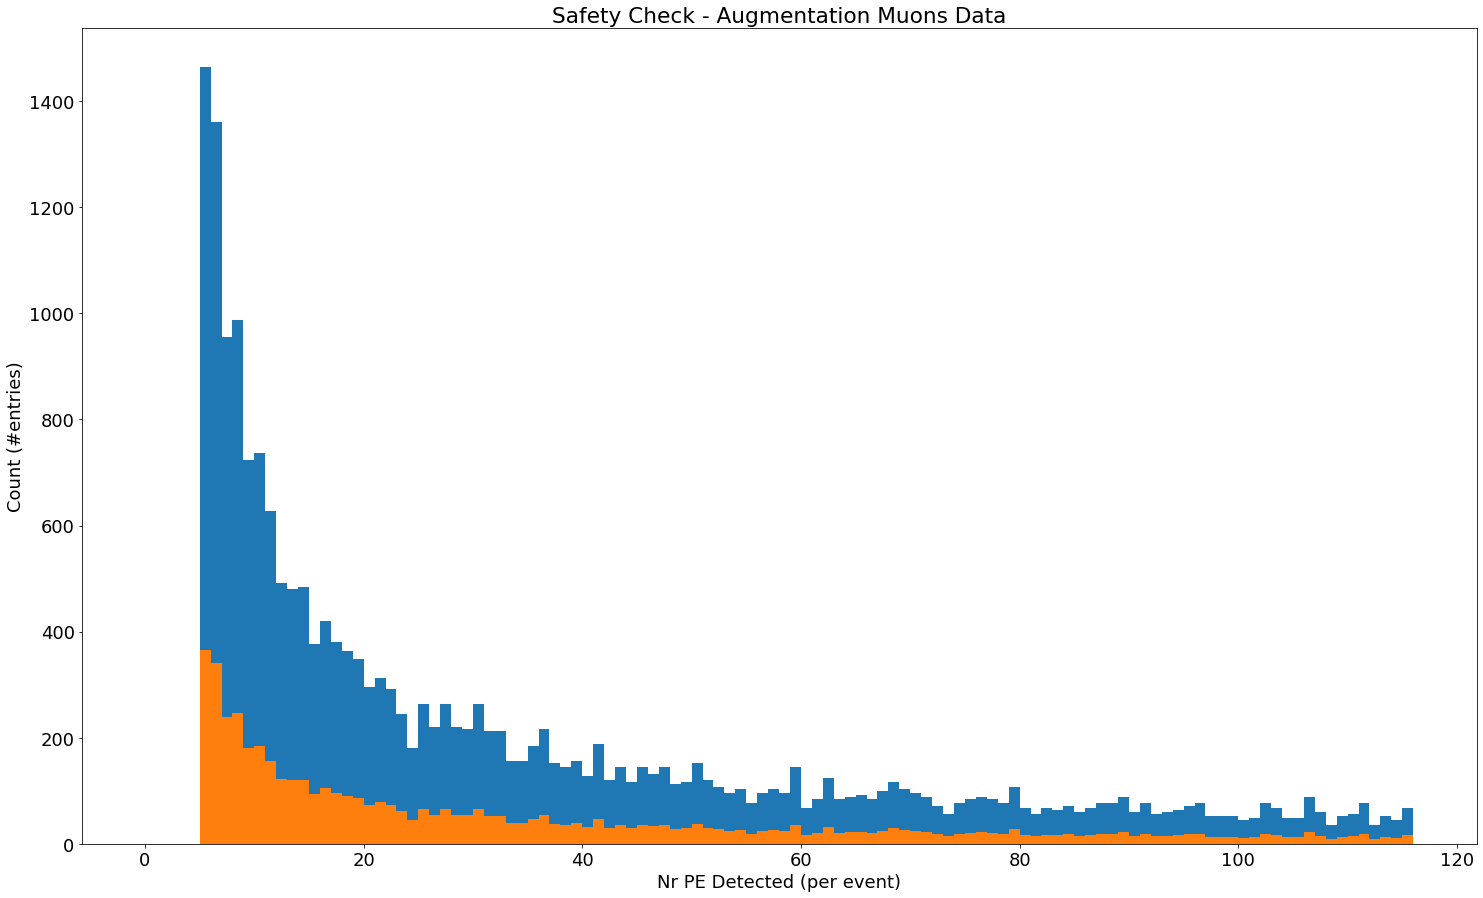

In [10]:
bins = np.linspace(0, 116, 117)
plt.hist(aug_mu_train.sum(axis=1), bins=bins, label="Augmented Muons")
plt.hist(muons_train.pedetected, bins=bins, label="Original Muons")
plt.title("Safety Check - Augmentation Muons Data")
plt.xlabel("Nr PE Detected (per event)")
plt.ylabel("Count (#entries)")
plt.show()

## Undersample Ar39
Since we need to produce a balanced dataset with about 20000 Ar39 instances, we undersample the Ar39 instances.
However, to guarantee enough instances for the critical classes (2, 3, 4 Pileups), we propose the following distribution:
1. 1 Ar39: 10 % of training data (*2000 instances*)
1. 2, 3 Ar39 Pileups: 20 % of training data (*4000 instances*)
1. 4, 5 Ar39 Pileups: 15 % of training data (*3000 instances*)
1. 6, 7 Ar39 Pileups: 10 % of training data (*2000 instances*)

In [11]:
def undersample_argon(ar39_df, number_of_instances=1000, augment_from_pe=35, augmentation_nr=5,
                      skip_first_cols=2, nslices=72, name="Ar39"):
    bins = np.linspace(0, maxPEar39+1, maxPEar39+2)
    bin_cont, bin_edges, _ = plt.hist(ar39_df.pedetected, bins=bins, density=True, label=name, edgecolor='w')
    plt.legend()
    plt.yscale("log")
    # compute the nr of samples for each PE value,
    # to undersample ar39 keeping the same distribution
    avail_instances_per_pe = np.array([len(ar39_df[ar39_df.pedetected==pe]) for pe in range(maxPEar39+1)])
    nr_ar_samples_per_pe = np.array(np.where(np.ceil(bin_cont*number_of_instances)<=avail_instances_per_pe, np.ceil(bin_cont*number_of_instances), avail_instances_per_pe), dtype=int)
    # Introduce a small bias on instances with "high" PE value
    # to avoid to have just a few samples (e.g. 30,40,50,60 PE)
    scaled_ar39 = pd.DataFrame()
    for pe in range(maxPEar39+1):
        if pe > augment_from_pe:
            nr_instances = augmentation_nr
        else:
            nr_instances = nr_ar_samples_per_pe[pe]
        scaled_ar39 = pd.concat([scaled_ar39, ar39_df[ar39_df.pedetected==pe].iloc[:nr_instances]])
    AA = scaled_ar39.iloc[:, skip_first_cols:skip_first_cols+nslices].to_numpy()
    np.random.shuffle(AA)    # to avoid order by PE
    return pd.DataFrame(AA)

[Info] 1 Ar39 Pileup: Undersampling 4000 instances from 1374688 (cut [5, 115] PE)
[Info] 1 Ar39 Pileup: Undersampled training data are 4032 instances
[Info] 2 Ar39 Pileup: Undersampling 4000 instances from 1847067 (cut [5, 115] PE)
[Info] 2 Ar39 Pileup: Undersampled training data are 4038 instances
[Info] 3 Ar39 Pileup: Undersampling 4000 instances from 1790920 (cut [5, 115] PE)
[Info] 3 Ar39 Pileup: Undersampled training data are 4043 instances
[Info] 4 Ar39 Pileup: Undersampling 3000 instances from 1461075 (cut [5, 115] PE)
[Info] 4 Ar39 Pileup: Undersampled training data are 3047 instances
[Info] 5 Ar39 Pileup: Undersampling 3000 instances from 1161754 (cut [5, 115] PE)
[Info] 5 Ar39 Pileup: Undersampled training data are 3049 instances
[Info] 6 Ar39 Pileup: Undersampling 2000 instances from 951448 (cut [5, 115] PE)
[Info] 6 Ar39 Pileup: Undersampled training data are 2058 instances
[Info] 7 Ar39 Pileup: Undersampling 1000 instances from 801235 (cut [5, 115] PE)
[Info] 7 Ar39 Pileup

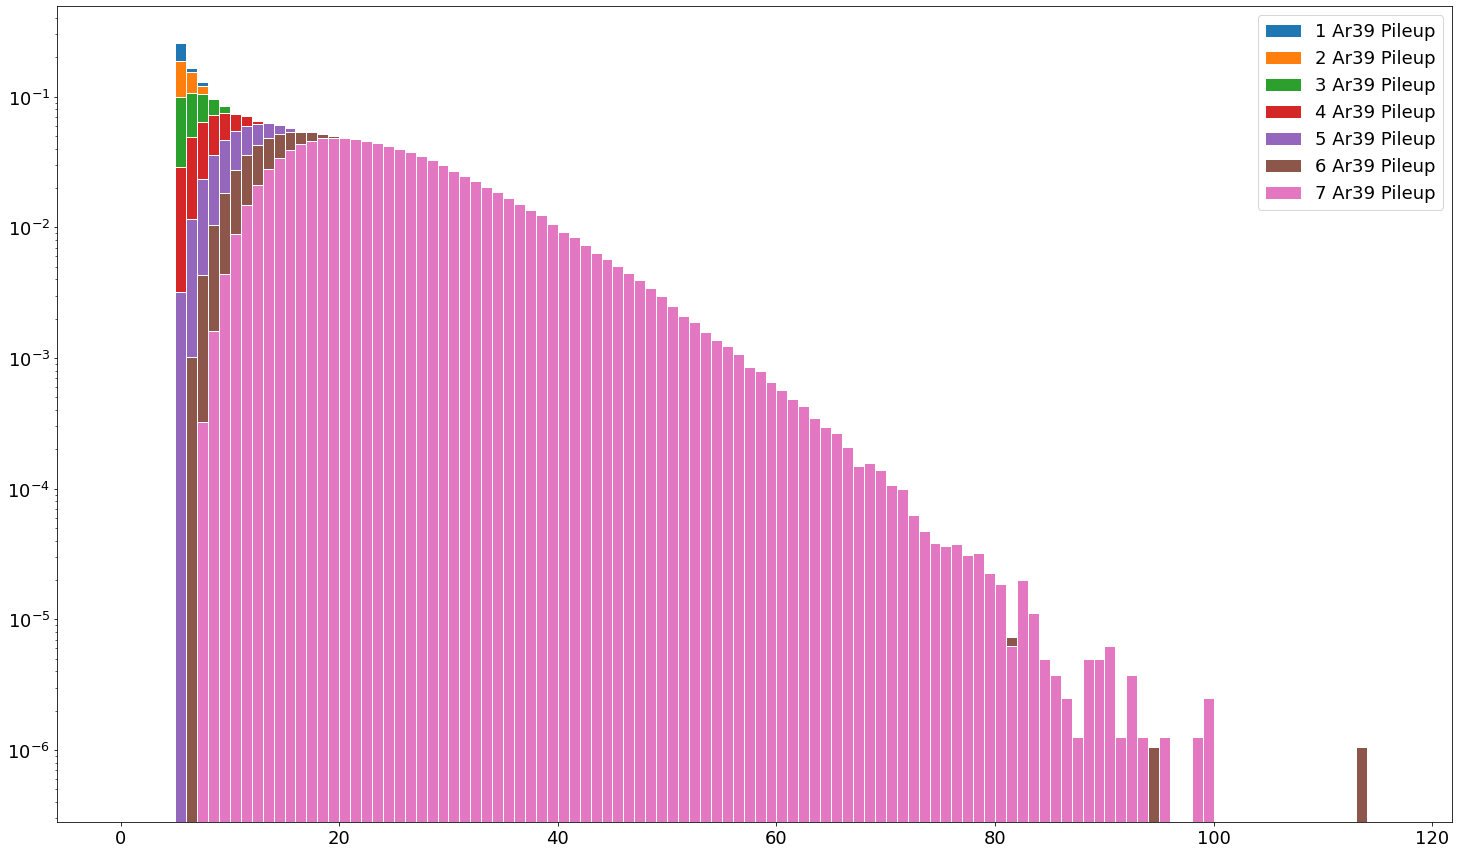

In [12]:
n_inner_slices, n_outer_slices = 12, 20
nr_instances_per_pileup = [4000, 4000, 4000, 3000, 3000, 2000, 1000]
sampled_ar39_dfs_train = []
for ar39_train, nr_instances, name in zip(ar39_dfs_train, nr_instances_per_pileup, ar39_dfs_names):
    ar39_train = ar39_train[(ar39_train.pedetected>=minPEcut) & (ar39_train.pedetected<=maxPEar39)]
    print("[Info] {}: Undersampling {} instances from {} (cut [{}, {}] PE)".format(name, nr_instances, len(ar39_train), minPEcut, maxPEar39))
    sampled_ar39 = undersample_argon(ar39_train, nr_instances, augment_from_pe=200, augmentation_nr=10, skip_first_cols=3, nslices=n_inner_slices+n_outer_slices, name=name)
    sampled_ar39_dfs_train.append(sampled_ar39)
    print("[Info] {}: Undersampled training data are {} instances".format(name, len(sampled_ar39)))

## Train CNN Model

In [13]:
import tensorflow as tf
import tensorflow.python.util.deprecation as deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False    # no deprecation warning print

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, plot_roc_curve
from sklearn.metrics import roc_auc_score

In [14]:
def get_twoconv_model(n_delta_t=1, n_slices=72):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=6, activation='relu', input_shape=(n_slices, n_delta_t)))
    model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(tf.keras.layers.MaxPooling1D(pool_size=3))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(16, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    return model

def get_compiled_model(n_delta_t=1, n_slices=72):
    model = get_twoconv_model(n_delta_t, n_slices)
    binary_accuracy = tf.keras.metrics.BinaryAccuracy(threshold=0.50)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy", binary_accuracy])
    return model

In [15]:
# Prepare data
all_train = pd.DataFrame()
# Attach muons
aug_mu_train["y"] = 1
all_train = pd.concat([all_train, aug_mu_train])
# Attach Ar39 Pileups
for ar39_train, name in zip(sampled_ar39_dfs_train, ar39_dfs_names):
    print(name)
    ar39_train["y"] = 0
    all_train = pd.concat([all_train, ar39_train])

1 Ar39 Pileup
2 Ar39 Pileup
3 Ar39 Pileup
4 Ar39 Pileup
5 Ar39 Pileup
6 Ar39 Pileup
7 Ar39 Pileup


## Tune model
In this section we aim to train a preliminary model on a bunch of data to see the trend of performance.

In particular, we aim to tune:
1. Number of epochs and batch size
1. Optimization algorithm and its parameters
1. Initialization of weights and biases
1. Network architecture: activation function, number of neutrons, filter size, number of layers
1. Dropout factor for regularization

In [16]:
# Tune model
"""
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

X, y = all_train.iloc[:, :-1], all_train.iloc[:, -1]
X = X.to_numpy().reshape((X.shape[0], X.shape[1], 1))    # to consistency with NN input

model = KerasClassifier(build_fn=get_compiled_model, n_slices=n_inner_slices+n_outer_slices)

param_grid = dict(epochs=[5],
                  batch_size=[8, 16])
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(X, y)
"""

'\nfrom sklearn.model_selection import GridSearchCV\nfrom tensorflow.keras.wrappers.scikit_learn import KerasClassifier\n\nX, y = all_train.iloc[:, :-1], all_train.iloc[:, -1]\nX = X.to_numpy().reshape((X.shape[0], X.shape[1], 1))    # to consistency with NN input\n\nmodel = KerasClassifier(build_fn=get_compiled_model, n_slices=n_inner_slices+n_outer_slices)\n\nparam_grid = dict(epochs=[5],\n                  batch_size=[8, 16])\ngrid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)\ngrid_result = grid.fit(X, y)\n'

In [17]:
"""
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
"""

'\nprint("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))\nmeans = grid_result.cv_results_[\'mean_test_score\']\nstds = grid_result.cv_results_[\'std_test_score\']\nparams = grid_result.cv_results_[\'params\']\nfor mean, stdev, param in zip(means, stds, params):\n    print("%f (%f) with: %r" % (mean, stdev, param))\n'

In [18]:
X, y = all_train.iloc[:, :-1], all_train.iloc[:, -1]
X = X.to_numpy().reshape((X.shape[0], X.shape[1], 1))    # to consistency with NN input
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.1, random_state=1)

In [19]:
import datetime

model_name="model_" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/" + model_name 
model_dir = "models/" + model_name

n_epochs=10
batch_size=16

print("[Info] Starting Repeatition {}, {} epochs".format(1, n_epochs))

model = get_compiled_model(n_delta_t=1, n_slices=n_inner_slices+n_outer_slices)

# compile model
# Callback: tensorboard and save best model
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=os.path.join(log_dir, "model.repeat" + str(1)), histogram_freq=1)
modelcheckpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(model_dir, "model.oncerepeat" + str(1) + ".epoch{epoch:02d}-valacc{val_accuracy:.5f}"),
                                                              save_best_only=True, monitor='val_accuracy', mode='max',
                                                              save_weights_only=False)
    
# train
hst = model.fit(X_train, y_train, epochs = n_epochs, batch_size = batch_size, 
                verbose = 1, callbacks=[tensorboard_callback], validation_data=(X_dev, y_dev))

[Info] Starting Repeatition 1, 10 epochs
Epoch 1/10
2381/2381 [==============================] - 6s 3ms/step - loss: 0.3763 - accuracy: 0.8267 - binary_accuracy: 0.8267 - val_loss: 0.3697 - val_accuracy: 0.8315 - val_binary_accuracy: 0.8315
Epoch 2/10
2381/2381 [==============================] - 6s 2ms/step - loss: 0.3346 - accuracy: 0.8520 - binary_accuracy: 0.8520 - val_loss: 0.3363 - val_accuracy: 0.8431 - val_binary_accuracy: 0.8431
Epoch 3/10
2381/2381 [==============================] - 6s 2ms/step - loss: 0.3274 - accuracy: 0.8553 - binary_accuracy: 0.8553 - val_loss: 0.3377 - val_accuracy: 0.8462 - val_binary_accuracy: 0.8462
Epoch 4/10
2381/2381 [==============================] - 6s 2ms/step - loss: 0.3242 - accuracy: 0.8572 - binary_accuracy: 0.8572 - val_loss: 0.3286 - val_accuracy: 0.8483 - val_binary_accuracy: 0.8483
Epoch 5/10
2381/2381 [==============================] - 6s 3ms/step - loss: 0.3198 - accuracy: 0.8593 - binary_accuracy: 0.8593 - val_loss: 0.3333 - val_accura

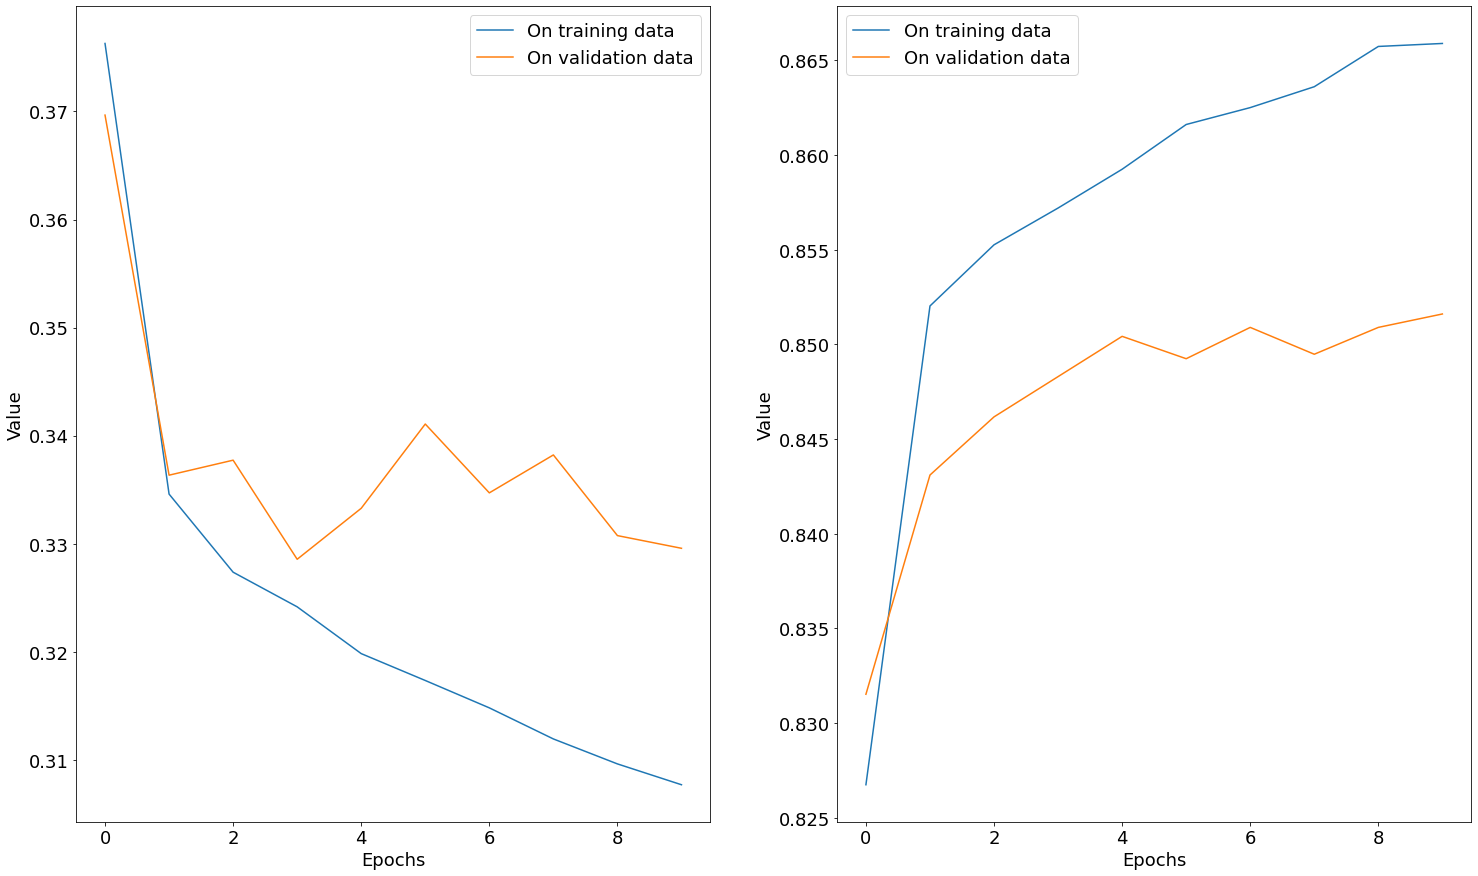

In [20]:
plt.subplot(1, 2, 1)
plt.plot(hst.history["loss"], label="On training data")
plt.plot(hst.history["val_loss"], label="On validation data")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hst.history["binary_accuracy"], label="On training data")
plt.plot(hst.history["val_binary_accuracy"], label="On validation data")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.legend()
plt.show()

In [21]:
X_test = muons_test.iloc[:, 3:].to_numpy()
y_test = np.ones(len(muons_test))
for ar39_test, name in zip(ar39_dfs_test, ar39_dfs_names):
    X_test = np.concatenate([X_test, ar39_test.iloc[:, 3:].to_numpy()])
    y_test = np.concatenate([y_test, np.zeros(len(ar39_test))])
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# prepare test data
import time
init = time.time()
y_pred = model.predict(X_test)
y_binpred = y_pred.round()
print("[Info] Inference on {} instances: {:.3f} sec".format(len(y_test), time.time()-init))

In [ ]:
accuracy = accuracy_score(y_test, y_binpred)
efficiency = recall_score(y_test, y_binpred)
purity = precision_score(y_test, y_binpred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
    
print("[Result] Model: {}. Evaluation on test set (threshold=0.50):\n" \
      "\tAccuracy: {:.3f},\n" \
      "\tEfficiency: {:.3f},\n" \
      "\tPurity: {:.3f},\n" \
      .format(model_name, accuracy, efficiency, purity))

plt.plot(fpr, tpr)
threshold_id = np.argmin(abs(thresholds-.50))
plt.scatter(fpr[threshold_id], tpr[threshold_id], color='r', label="Threshold: {:.2f}".format(thresholds[threshold_id]))
plt.text(.5, .5, "Training Set Size: {}, Test Set Size: {}\nAUC: {:.3f}".format(len(X_train)+len(X_dev), len(X_test), auc))
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.show()

## Per-class details
In this section, for each class of Ar39 pileups, we see the performance of the model.

In [ ]:
fprs = []
for ar39_test, name in zip(ar39_dfs_test, ar39_dfs_names):
    init = time.time()
    X_test = ar39_test.iloc[:, 3:].to_numpy()
    y_test = np.zeros(len(ar39_test))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    print("[Info] Class: {}".format(name))
    y_pred = model.predict(X_test)
    y_binpred = y_pred.round()
    print("\tInference on {} instances: {:.3f} sec".format(len(y_test), time.time()-init))
    # Update dataframe
    ar39_test["y"] = y_test
    ar39_test["y_pred"] = y_binpred
    # evaluate
    fp = len(y_binpred[y_binpred>0])
    tn = len(y_binpred) - fp
    fpr = fp / (fp + tn)
    print("\tTrue Negative: {}, False Positive: {}, FPR: {}".format(tn, fp, fpr))
    fprs.append(fpr)

In [ ]:
plt.bar(np.arange(len(fprs)), fprs, tick_label=ar39_dfs_names)
plt.title("Per-Class FPR")
plt.xlabel("Ar39 Class")
plt.ylabel("False Positive Rate")
plt.show()

## Detail: PE Spectrum of per-class classification

In [ ]:
bins = np.linspace(0, 115, 116)
for i, (ar39_test, name) in enumerate(zip(ar39_dfs_test, ar39_dfs_names)):
    plt.subplot(7, 1, i+1)
    plt.hist(ar39_test.pedetected, bins=bins, label="Accepted", color="green")
    plt.hist(ar39_test[(ar39_test.pedetected<5) | (ar39_test.y_pred==0)].pedetected, bins=bins, label="Rejected", color="red")
    plt.legend()
    plt.yscale("log")
plt.show()